### USBL DATA PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
# This notebook reads csv info extracted from bagfile topics
# To obtain the csvs desired files use usbldata_csv_extractor.py script execute by doing: 
# python usbldata_csv_extractor.py path_to_the_bagfile

# Once the csvs are extracted save them following this structure:
# Desired path + turbot + 
                           #  modem_delayed":"modem_delayed.csv
                           #  modem_raw":"modem_raw.csv
                           #  USBLlon":"USBLlon.csv
                           #  nav_status_turbot":"nav_status_tu.csv
                
# Desired path + xiroi + nav_status_xi.csv           



#Path to folder containing the robot files that contain the csvs
#Change this path and reexecute the notebook to obtain the results from a different bagfile:

path ='/home/uib/bagfiles/postprocessing_cat/csvs/andratx/21_07/'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "xiroi_setpoints":"xiroi_setpoints.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file,robot):
    df=pd.read_csv(path+robot+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:
#Create topic dataframes:

robot="turbot"
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT NAVIGATION")
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot",robot)
display(turbot_nav_status.head())
display(turbot_nav_status.tail())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT USBLLONG")
USBLlon_0,USBLlon=create_df("USBLlon",robot)
display(USBLlon.head())
display(USBLlon.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM RAW")
modem_raw_0,modem_raw=create_df("modem_raw",robot)
display(modem_raw.head())
display(modem_raw.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

robot="xiroi"
print("XIROI NAVIGATION")
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS")
xiroi_setpoints_0,xiroi_setpoints=create_df("xiroi_setpoints",robot)
display(xiroi_setpoints.head())
display(xiroi_setpoints.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI USBLLONG")
USBLlon_0_x,USBLlon_x=create_df("USBLlon",robot)
#display(USBLlon_0_x.head())
#USBLlon_0_x.describe()

---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-07-21 12:59:26.300,1.939367,-35.327826,-19.592260,9.876452,39.54333,2.37794,0.071933,-0.007935,0.818830
2021-07-21 12:59:26.400,1.952916,-35.326789,-19.589924,9.840206,39.54333,2.37794,0.070417,-0.012718,0.816309
2021-07-21 12:59:26.500,1.966509,-35.327077,-19.588749,9.836182,39.54333,2.37794,0.068344,-0.019260,0.814908
2021-07-21 12:59:26.600,1.978122,-35.326162,-19.586267,9.819612,39.54333,2.37794,0.065564,-0.028697,0.812679
2021-07-21 12:59:26.700,1.977481,-35.324677,-19.583508,9.806831,39.54333,2.37794,0.063633,-0.035881,0.809654


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-07-21 13:46:14.000,0.627720,21.263312,-11.956685,7.481608,39.54333,2.37794,0.293054,-0.090295,-2.806689
2021-07-21 13:46:14.100,0.621916,21.260734,-11.944544,7.471697,39.54333,2.37794,0.287213,-0.086792,-2.807997
2021-07-21 13:46:14.200,0.617152,21.259532,-11.937443,7.465266,39.54333,2.37794,0.282555,-0.086288,-2.811377
2021-07-21 13:46:14.300,0.612364,21.248856,-11.943996,7.462174,39.54333,2.37794,0.278805,-0.088739,-2.815600
2021-07-21 13:46:14.400,0.608085,21.239818,-11.948999,7.458466,39.54333,2.37794,0.278126,-0.094153,-2.819091


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,28082.000000,28082.000000,28082.000000,28082.000000,2.808200e+04,28082.00000,28082.000000,28082.000000,28082.000000
mean,7.234893,-23.194834,-3.179015,3.280512,3.954333e+01,2.37794,-0.089899,0.001524,-0.074091
std,2.568498,31.080749,18.539584,1.303334,1.421111e-14,0.00000,0.191386,0.141550,1.732888
min,0.608085,-87.210283,-72.049591,0.430164,3.954333e+01,2.37794,-1.524880,-3.001013,-3.137250
25%,5.494374,-48.766649,-16.084510,3.028069,3.954333e+01,2.37794,-0.179989,-0.054645,-2.032407
50%,7.301294,-20.418201,-6.719570,3.257191,3.954333e+01,2.37794,-0.087513,-0.019032,0.743459
75%,9.512158,-0.701163,9.445049,3.590977,3.954333e+01,2.37794,0.027408,0.013070,1.034165
max,12.080815,65.210855,39.007115,9.876452,3.954333e+01,2.37794,0.436680,2.995882,3.139940


---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT USBLLONG


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
stamp,,,,,,,,,
2021-07-21 13:00:35.900,-1.1173,19.161301,-17.810101,19.7243,17.1141,-1.9136,-0.0059,0.0396,1.6036
2021-07-21 13:00:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,5.306924,8.221801,-10.470947,11.986431,-0.056668,5.651868,0.032288,-0.005376,0.247990
std,5.184407,13.491205,10.144250,13.119780,11.876583,5.332855,0.030373,0.036569,1.950231
min,-37.823601,-43.887299,-43.820801,-39.857800,-44.288101,-37.866299,-0.063000,-0.134900,-3.139500
25%,3.789100,-0.242250,-15.609350,4.601650,-7.349350,4.294150,0.011400,-0.029750,-1.911900
50%,6.135200,9.593700,-10.163500,12.784000,0.416600,6.628900,0.031400,-0.004200,1.391900
75%,8.267800,17.304550,-4.828350,19.927199,9.375350,8.682550,0.053700,0.019800,1.796900
max,11.879900,39.168999,21.062401,46.032001,27.963600,14.569700,0.176300,0.110300,3.111400


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM DELAYED


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
stamp,,,,,,,
2021-07-21 13:00:35.900,-13.002112,-11.864608,-0.3173,1.0,0.0,0.0,0.0
2021-07-21 13:00:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
count,671.000000,671.000000,671.000000,671.0,671.0,671.0,671.0
mean,-6.083307,-25.077685,6.101668,1.0,0.0,0.0,0.0
std,18.175173,30.365222,5.207505,0.0,0.0,0.0,0.0
min,-41.354529,-89.062361,-37.023601,1.0,0.0,0.0,0.0
25%,-18.496362,-49.643322,4.574700,1.0,0.0,0.0,0.0
50%,-9.598988,-19.914092,6.912100,1.0,0.0,0.0,0.0
75%,5.706985,-3.180634,9.099800,1.0,0.0,0.0,0.0
max,44.706202,23.996310,12.679900,1.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM RAW


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,
2021-07-21 13:00:35.900,-13.002112,-11.864608,-0.3173,0.956875,-0.077977,0.06053,0.273214
2021-07-21 13:00:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21 13:00:36.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,-6.869997,-24.492375,6.806886,0.665498,0.020144,-0.033802,0.091557
std,17.767756,30.463333,3.384259,0.276650,0.080837,0.072663,0.678024
min,-41.354529,-89.062361,-18.441199,0.012498,-0.261703,-0.512809,-0.998583
25%,-18.838929,-49.589980,5.022500,0.418317,-0.030138,-0.065884,-0.824966
50%,-10.501835,-19.179269,7.160850,0.823295,0.009525,-0.030643,0.412547
75%,5.374249,-2.802541,9.450092,0.894354,0.054185,-0.007370,0.508609
max,44.706202,23.996310,12.679900,0.999976,0.475867,0.207918,0.997109


----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-07-21 13:09:51.000,0.0,-64.968823,25.838514,0.0,39.54333,2.37794,0.0,0.0,-2.612832
2021-07-21 13:09:51.100,0.0,-65.045097,25.821066,0.0,39.54333,2.37794,0.0,0.0,-2.611481
2021-07-21 13:09:51.200,0.0,-65.129117,25.789651,0.0,39.54333,2.37794,0.0,0.0,-2.585555
2021-07-21 13:09:51.300,0.0,-65.195090,25.765548,0.0,39.54333,2.37794,0.0,0.0,-2.574117
2021-07-21 13:09:51.400,0.0,-65.274522,25.723673,0.0,39.54333,2.37794,0.0,0.0,-2.563810


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-07-21 13:47:19.300,0.0,30.107259,2.388266,0.0,39.54333,2.37794,0.0,0.0,-0.814055
2021-07-21 13:47:19.400,0.0,30.110000,2.412796,0.0,39.54333,2.37794,0.0,0.0,-0.778067
2021-07-21 13:47:19.500,0.0,30.093582,2.426588,0.0,39.54333,2.37794,0.0,0.0,-0.773919
2021-07-21 13:47:19.600,0.0,30.091983,2.447678,0.0,39.54333,2.37794,0.0,0.0,-0.767291
2021-07-21 13:47:19.700,0.0,30.101205,2.454212,0.0,39.54333,2.37794,0.0,0.0,-0.731819


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,22488.0,22488.000000,22488.000000,22488.0,2.248800e+04,2.248800e+04,22488.0,22488.0,22488.000000
mean,0.0,-31.118298,2.133680,0.0,3.954333e+01,2.377940e+00,0.0,0.0,0.332889
std,0.0,31.519613,17.856394,0.0,1.421117e-14,4.440991e-16,0.0,0.0,2.070531
min,0.0,-90.764102,-28.533659,0.0,3.954333e+01,2.377940e+00,0.0,0.0,-3.139342
25%,0.0,-55.633859,-14.012042,0.0,3.954333e+01,2.377940e+00,0.0,0.0,-2.093266
50%,0.0,-28.181308,2.128590,0.0,3.954333e+01,2.377940e+00,0.0,0.0,1.554207
75%,0.0,-16.020481,19.024612,0.0,3.954333e+01,2.377940e+00,0.0,0.0,1.944537
max,0.0,30.110000,32.114044,0.0,3.954333e+01,2.377940e+00,0.0,0.0,3.140007


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS


,setpoint_0,setpoint_1
stamp,,
2021-07-21 13:09:51.000,-0.999792,-0.997333
2021-07-21 13:09:51.100,-0.958989,-0.999792
2021-07-21 13:09:51.200,-0.999792,-0.868794
2021-07-21 13:09:51.300,-0.999792,-0.739388
2021-07-21 13:09:51.400,-0.999792,-0.907046


,setpoint_0,setpoint_1
count,22487.000000,22487.000000
mean,-0.236389,-0.131935
std,0.383034,0.337562
min,-0.999792,-0.999792
25%,-0.596161,-0.113794
50%,0.000000,0.000000
75%,0.000000,0.000000
max,0.728952,0.672004


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI USBLLONG


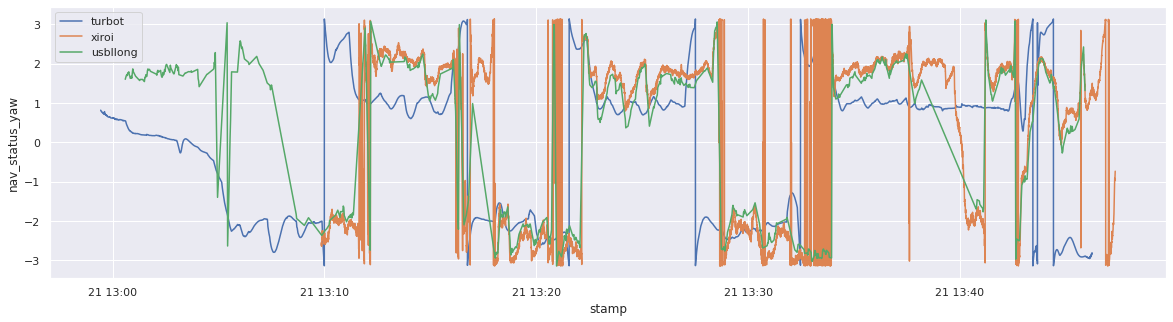

In [5]:
# Plot yaw
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=turbot_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=xiroi_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=USBLlon.dropna(),x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()
# The dataset from the xiroi navigation is shorter than the rest
# There is an offset rotation between the xiroi mag and the usbl mag. Let me unify datasets

In [6]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
nav=nav.join(USBLlon).dropna()
#nav=nav.join(modem_delayed).dropna()
nav=nav.join(modem_raw).dropna()
nav.head()

nav=nav.join(xiroi_setpoints).dropna()
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,usbllong_yaw,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z,setpoint_0,setpoint_1
stamp,,,,,,,,,,,,,,,,,,,,,
2021-07-21 13:09:52.400,4.360769,-76.624477,6.888259,3.847429,39.54333,2.37794,0.012074,-0.037364,-2.001960,0.0,...,-2.3634,11.529649,-87.025143,1.3825,0.539481,-0.004989,0.018964,-0.841769,-0.999792,0.179965
2021-07-21 13:10:04.000,4.800279,-83.923549,6.695276,3.831209,39.54333,2.37794,-0.030198,-0.084651,2.718939,0.0,...,-2.2146,9.979530,-89.014615,2.5733,0.210686,0.005977,-0.045108,0.976494,0.000000,0.000000
2021-07-21 13:10:06.800,4.954597,-86.815389,8.266139,3.734808,39.54333,2.37794,-0.064950,-0.149052,2.446444,0.0,...,-2.1902,9.154144,-88.367862,2.7379,0.343590,0.004885,-0.081382,0.935574,0.000000,0.000000
2021-07-21 13:10:13.300,5.194508,-85.872667,7.536465,3.688283,39.54333,2.37794,-0.034728,-0.148576,2.105476,0.0,...,-2.0975,8.607327,-87.317373,3.0718,0.494513,-0.021659,-0.073755,0.865764,0.000000,0.000000
2021-07-21 13:10:31.400,5.738964,-81.488250,5.499398,3.674740,39.54333,2.37794,0.069015,-0.068170,2.337196,0.0,...,-1.8495,5.540882,-83.350321,3.3599,0.389848,-0.045022,-0.018393,0.919594,-0.999792,0.231480


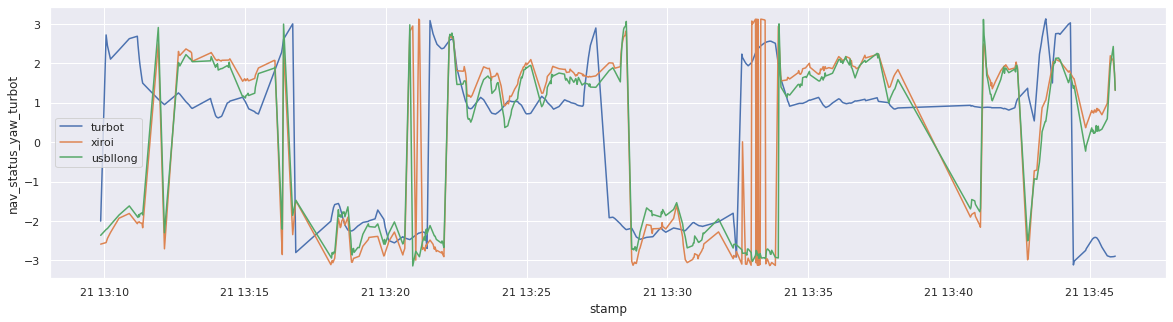

In [7]:
# Plot yaw again
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()

In [8]:
# Now get the mean yaw difference
yaw_diff = nav.nav_status_yaw_xiroi.mean() - nav.usbllong_yaw.mean()
print(yaw_diff*180/np.pi)

# We will assume that ther is a 90º rotation
nav['usbllong_yaw_corrected'] = nav['usbllong_yaw'] + yaw_diff

12.460518178077328


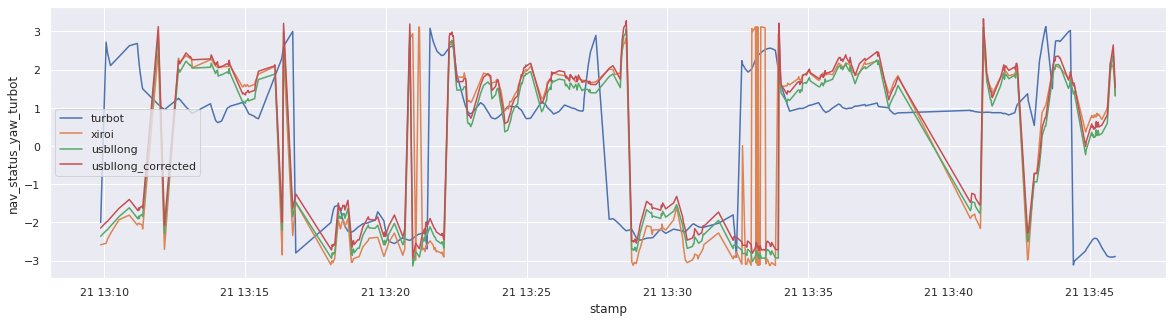

In [9]:
# Plot yaw again!!
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw_corrected",ax=ax)
plt.legend(["turbot","xiroi","usbllong", "usbllong_corrected"])
plt.show()
# The differences are due to the use of different calibrations

In [10]:
# Lets transform the USBL measurements, use the following transformation matrix for the rotations
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

# 1 - Xiroi + usbllong (mag xiroi)
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])
nav['p1_N'] = nav['nav_status_N_xiroi'] + usbllong_X_transf
nav['p1_E'] = nav['nav_status_E_xiroi'] + usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) 
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw_corrected"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw_corrected"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw_corrected"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw_corrected"])
nav['p2_N'] = nav['nav_status_N_xiroi']+usbllong_X_transf
nav['p2_E'] = nav['nav_status_E_xiroi']+usbllong_Y_transf


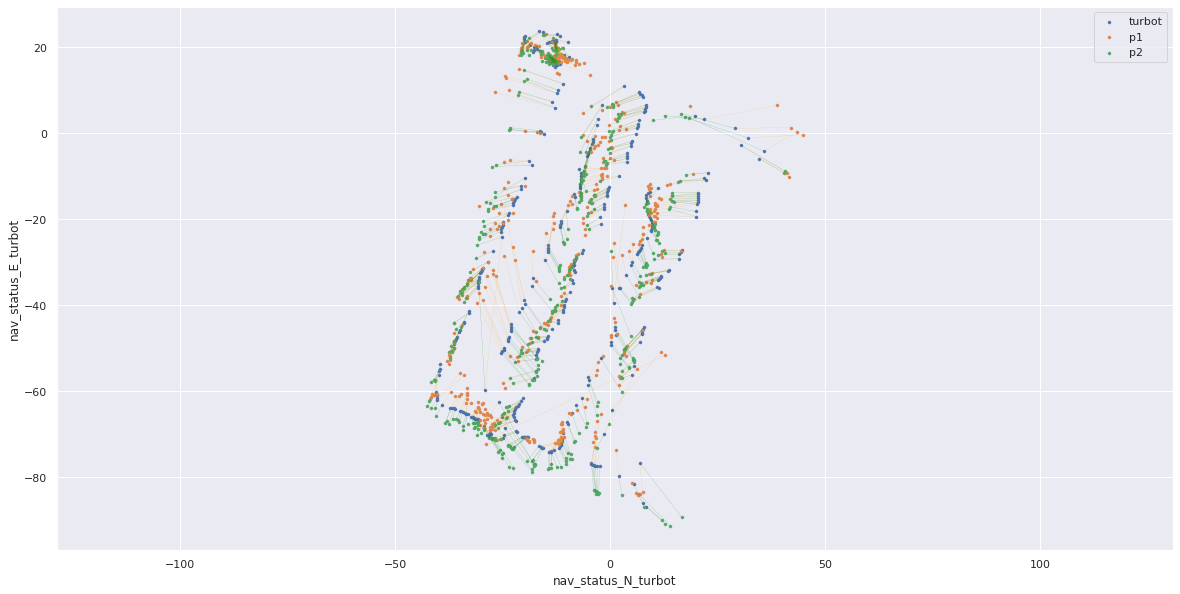

In [11]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","p1","p2","modem_raw"])
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
plt.axis('equal')
plt.show()

In [12]:
# Compute error
N_error_p1 = np.abs(nav['nav_status_N_turbot']-nav['p1_N'])
E_error_p1 = np.abs(nav['nav_status_E_turbot']-nav['p1_E'])
nav['error_p1'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p1,2))

N_error_p2 = np.abs(nav['nav_status_N_turbot']-nav['p2_N'])
E_error_p2 = np.abs(nav['nav_status_E_turbot']-nav['p2_E'])
nav['error_p2'] = np.sqrt(np.power(N_error_p2,2)+np.power(E_error_p2,2))

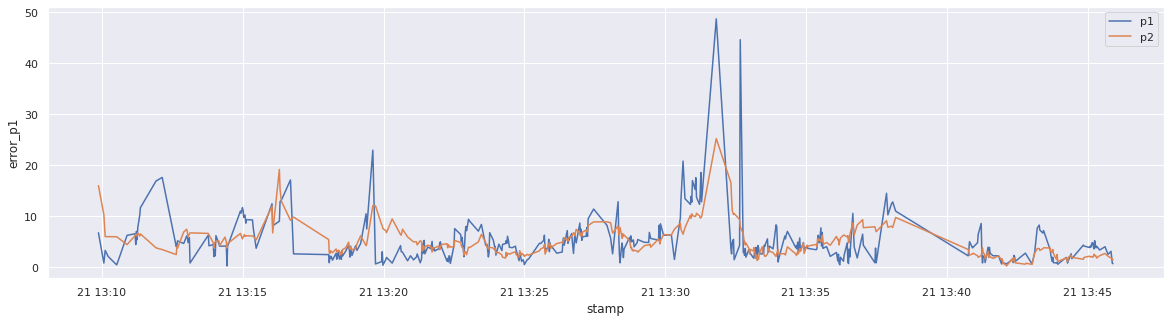

In [13]:
# Plot error 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="error_p1",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p2",ax=ax)
plt.legend(["p1","p2"])
plt.show()

In [14]:
# Compute acoustic distance 
E_dist = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
N_dist = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])
D_dist = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']

nav['dist_2D']=np.sqrt(np.power(E_dist,2)+np.power(N_dist,2))
nav['dist_3D']=np.sqrt(np.power(nav['dist_2D'],2)+np.power(D_dist,2))

In [15]:
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,setpoint_1,usbllong_yaw_corrected,p1_N,p1_E,p2_N,p2_E,error_p1,error_p2,dist_2D,dist_3D
stamp,,,,,,,,,,,,,,,,,,,,,
2021-07-21 13:09:52.400,4.360769,-76.624477,6.888259,3.847429,39.54333,2.37794,0.012074,-0.037364,-2.001960,0.0,...,0.179965,-2.145923,7.502253,-83.321319,16.617866,-89.287834,6.724929,15.969529,21.365508,21.805991
2021-07-21 13:10:04.000,4.800279,-83.923549,6.695276,3.831209,39.54333,2.37794,-0.030198,-0.084651,2.718939,0.0,...,0.000000,-1.997123,5.994098,-83.557127,13.891345,-91.212517,0.791148,10.242679,19.851679,20.423806
2021-07-21 13:10:06.800,4.954597,-86.815389,8.266139,3.734808,39.54333,2.37794,-0.064950,-0.149052,2.446444,0.0,...,0.000000,-1.972723,6.374351,-84.143789,12.760851,-90.760272,3.273577,5.980347,19.730196,20.342779
2021-07-21 13:10:13.300,5.194508,-85.872667,7.536465,3.688283,39.54333,2.37794,-0.034728,-0.148576,2.105476,0.0,...,0.000000,-1.880023,6.846279,-83.932665,11.919180,-89.928214,2.059117,5.971235,19.623090,20.298980
2021-07-21 13:10:31.400,5.738964,-81.488250,5.499398,3.674740,39.54333,2.37794,0.069015,-0.068170,2.337196,0.0,...,0.231480,-1.632023,5.151150,-81.235899,7.847414,-86.945281,0.430067,5.940738,21.025357,21.794526


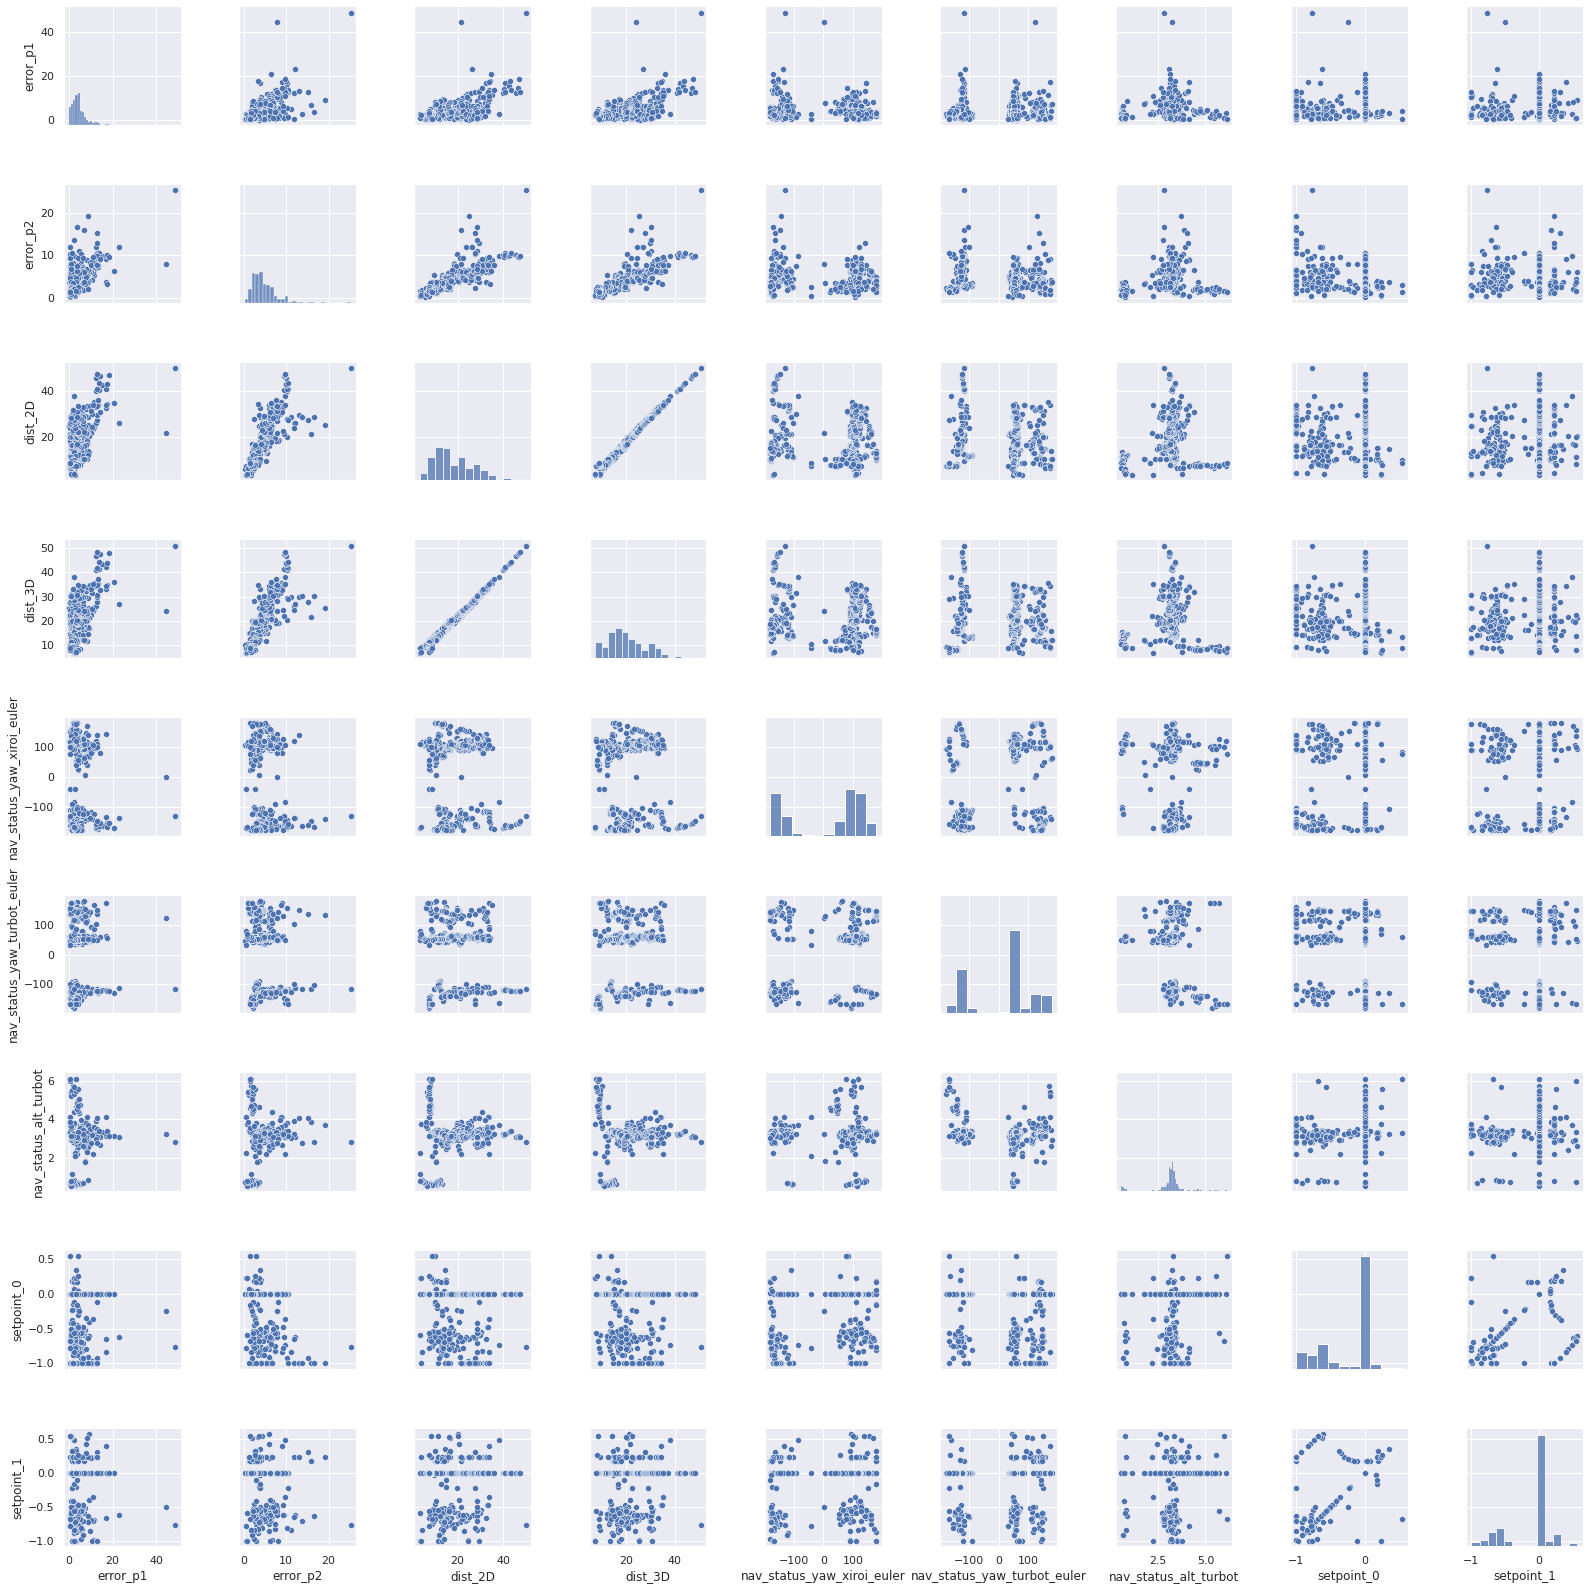

In [16]:
# Error correlation with distance and orientation
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
nav['nav_status_yaw_turbot_euler'] = nav['nav_status_yaw_turbot'] *180/np.pi 
nav_corr=nav[['error_p1','error_p2','dist_2D','dist_3D','nav_status_yaw_xiroi_euler','nav_status_yaw_turbot_euler','nav_status_alt_turbot',"setpoint_0","setpoint_1"]]
sns.pairplot(nav_corr)

,error_p1,error_p2,dist_3D,nav_status_yaw_xiroi
count,421.000000,421.000000,421.000000,421.000000
mean,4.924631,4.738875,20.586417,0.258430
std,4.570171,2.825566,8.292562,2.187295
min,0.224737,0.232772,7.036753,-3.131240
25%,2.329023,2.778115,14.504525,-2.314781
50%,4.013051,4.004868,19.285202,1.577706
75%,5.924639,6.106984,25.268861,1.915772
max,48.646765,25.194969,51.014335,3.122296


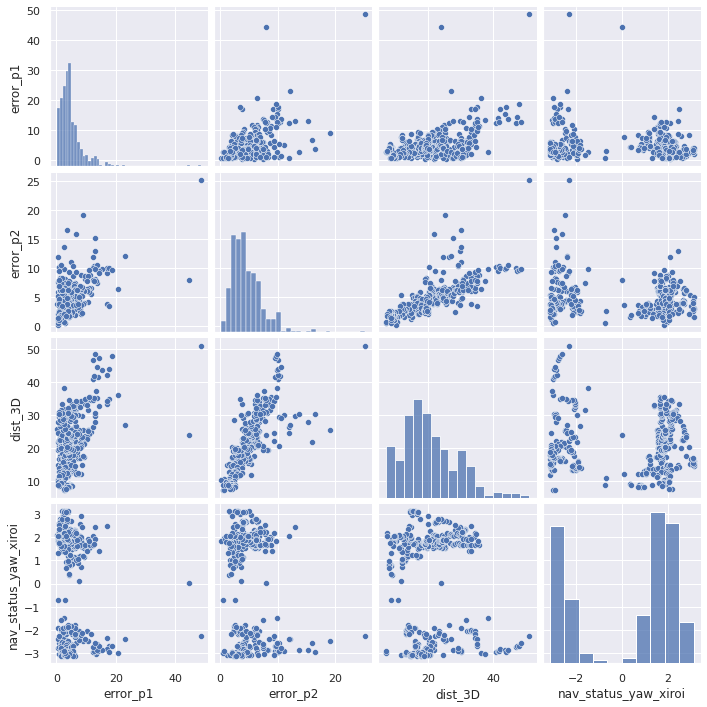

In [17]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','error_p2','dist_3D','nav_status_yaw_xiroi']]
sns.pairplot(nav_corr)
# There is a clear correlation between the usbl error and the xiroi orientation, not that evident but important with the distance
display(nav_corr.describe())

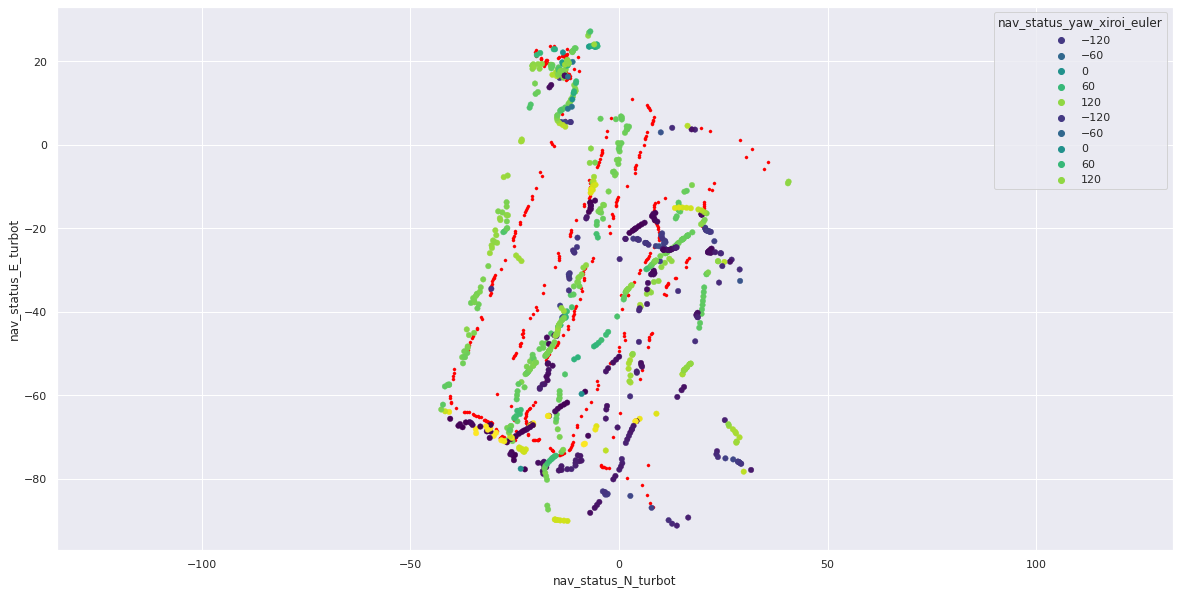

In [18]:
# Lets plot again the localization results, this time color represents the xiroi orientation
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

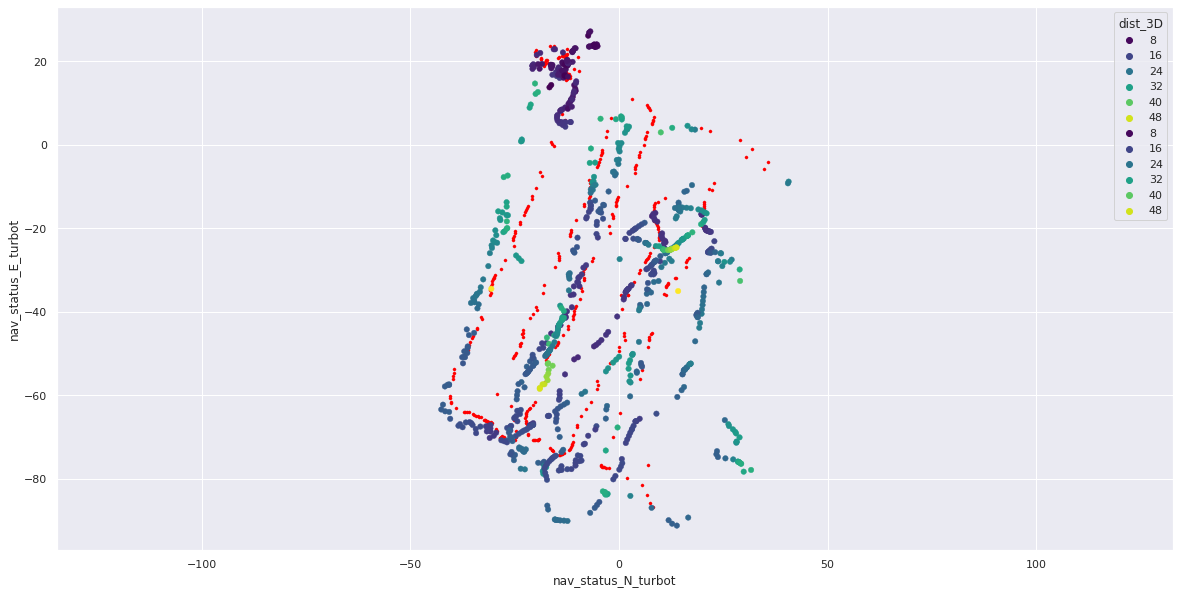

In [19]:
# Lets plot again the localization results, this time color represents the distance
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

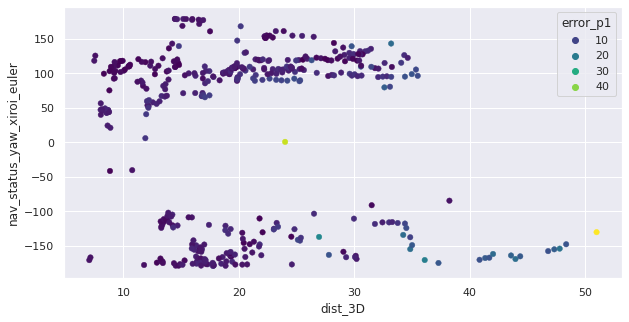

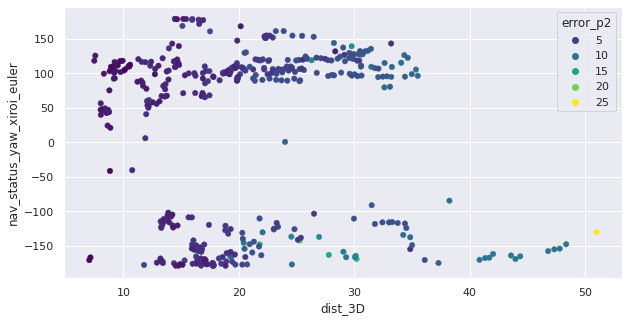

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p1', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p2', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()

In [21]:
# Check correlation with setpoints or speeds
# There is a clear correlation with the orientation. However it is not conclusive, we should check the correlation with setpoints or speeds. And check that in other datasets we find the same behavior.
# In case that we confirm this correlation find the cause
# Extract the RSSI values too